In [1]:
from pycaret.classification import *
import pandas as pd
import os
import wandb

os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["WANDB_API_KEY"]="4e5748d6c6f3917c78cdc38a516a1bac776faf58"
wandb.login()
wandb.init(
    project="cigap-classif",
)


wandb: Currently logged in as: antoine-toffano (mlb). Use `wandb login --relogin` to force relogin


In [2]:
df = pd.read_csv('/home/antoine/gene_pheno_pred/TorusE_2023-03-31_10-18-16_kg_test.csv' , header=0)


df['link'] = df['relation'].apply(lambda x: 1 if x != 'no_link_known' else 0)


In [3]:
df_num = df.drop(['head', 'relation', 'tail'], axis=1)
df_num

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,link
0,-0.022025,0.016013,0.008182,-0.016668,-0.017219,-0.015423,0.014788,-0.013625,0.004813,-0.010436,...,-0.009033,0.012363,-0.013047,0.012363,0.012363,-0.012363,0.013047,0.012363,-0.009570,0
1,0.011442,0.023409,0.027197,-0.026088,0.011466,0.011485,-0.011461,-0.027663,-0.021202,-0.024895,...,0.006576,0.009683,-0.019268,0.013770,0.008617,-0.013770,0.019268,0.013770,-0.022629,0
2,-0.002173,-0.002173,-0.002173,0.002173,-0.002173,-0.002173,0.002173,0.002173,0.002173,0.003111,...,-0.011501,-0.000944,0.000131,-0.000944,0.011679,0.000944,-0.006678,-0.001933,0.000131,0
3,0.017005,0.017386,0.017313,-0.017392,0.017594,0.017359,-0.017394,-0.017409,-0.017698,-0.016948,...,-0.016629,-0.018851,0.014528,0.018851,0.016371,-0.018774,-0.017279,0.018851,-0.004702,1
4,-0.009484,0.003228,-0.006519,-0.001198,-0.009484,-0.000704,0.006519,0.000694,0.004623,0.000704,...,0.009857,-0.007542,0.019304,-0.009442,-0.016714,0.013269,-0.011895,-0.011088,0.005852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467595,-0.003296,0.003037,-0.001115,0.007448,-0.001115,-0.007448,-0.003037,0.001115,0.007448,0.007448,...,-0.013422,-0.007389,-0.007389,-0.007389,0.013422,0.002157,-0.013422,-0.007389,-0.007389,0
467596,0.000480,0.000517,0.000911,0.003378,0.004769,-0.008777,-0.000911,-0.000480,0.008814,0.008777,...,0.007482,0.022879,-0.015594,0.013418,0.009380,-0.017695,0.021031,0.013418,-0.022710,1
467597,0.001610,0.005263,0.000994,0.000131,0.005880,-0.009614,-0.001610,-0.000994,0.014961,0.010230,...,-0.004721,0.019138,-0.012778,0.019138,0.016125,-0.019138,0.015792,0.016125,-0.004549,1
467598,-0.029945,-0.008771,0.006061,-0.006316,-0.018599,0.029698,-0.007143,0.017606,-0.015266,-0.025612,...,-0.008700,-0.002534,-0.002534,-0.002534,0.008700,0.002534,-0.008700,-0.002534,-0.002534,0


In [4]:
# Experiment setup
s = setup(df_num, target = 'link', fold_strategy = 'stratifiedkfold', fold=10, train_size = 0.8, n_jobs=-1, system_log=True, use_gpu = False, log_experiment='wandb')
exp = ClassificationExperiment()

,Description,Value
0,Session id,5786
1,Target,link
2,Target type,Binary
3,Original data shape,"(467600, 101)"
4,Transformed data shape,"(467600, 101)"
5,Transformed train set shape,"(374080, 101)"
6,Transformed test set shape,"(93520, 101)"
7,Numeric features,100
8,Preprocess,True
9,Imputation type,simple


# K Neighbors Classifier

In [5]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8446,0.8986,0.9329,0.7929,0.8572,0.6893,0.7003
1,0.8428,0.8962,0.9346,0.7897,0.8560,0.6856,0.6975
2,0.8433,0.8977,0.9350,0.7900,0.8564,0.6865,0.6984
3,0.8422,0.8952,0.9350,0.7886,0.8556,0.6844,0.6965
4,0.8442,0.8976,0.9341,0.7917,0.8570,0.6884,0.6998
5,0.8427,0.8952,0.9337,0.7900,0.8558,0.6855,0.6971
6,0.8426,0.8962,0.9352,0.7891,0.8559,0.6852,0.6973
7,0.8429,0.8987,0.9319,0.7911,0.8558,0.6858,0.6970
8,0.8412,0.8950,0.9327,0.7884,0.8545,0.6824,0.6941


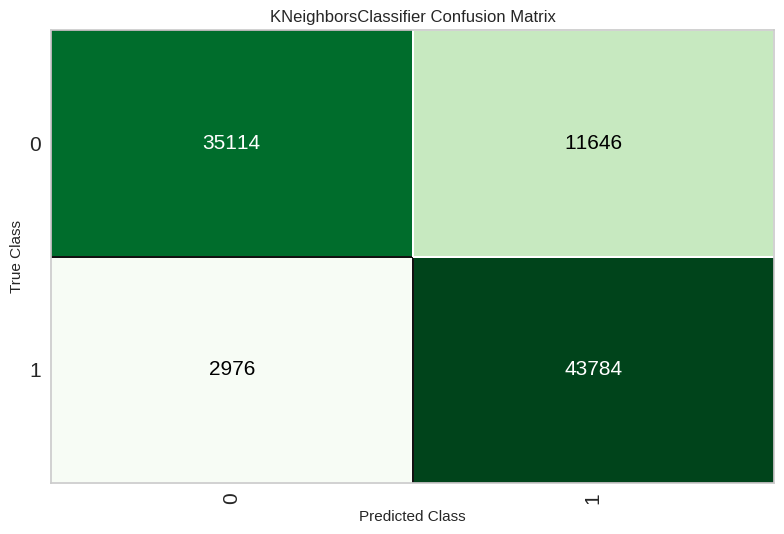

In [6]:
plot_model(knn, plot = 'confusion_matrix')

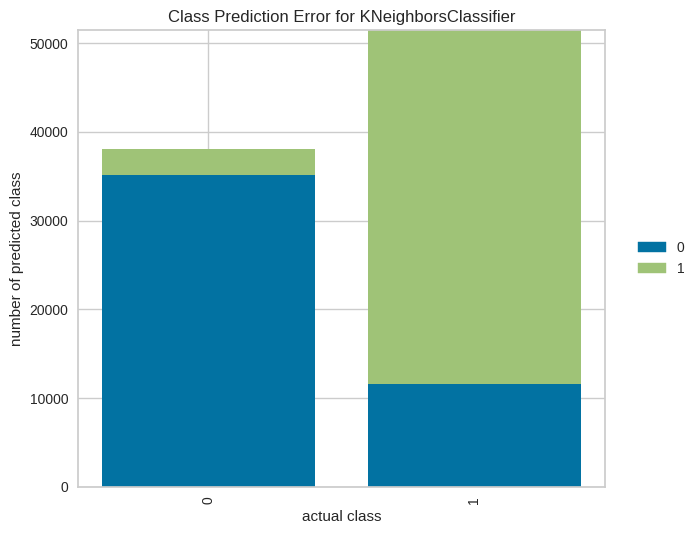

In [7]:
plot_model(knn, plot = 'error')

In [8]:
plot_model(knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform


In [9]:
save_model(knn, 'models_classif/toruse/knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Naive Bayes

In [10]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8396,0.8571,0.9371,0.7842,0.8538,0.6792,0.6925
1,0.8375,0.8557,0.9353,0.7823,0.8519,0.6749,0.6882
2,0.8337,0.8534,0.9305,0.7796,0.8484,0.6674,0.6803
3,0.8362,0.8544,0.9365,0.7800,0.8511,0.6724,0.6863
4,0.8397,0.8570,0.9354,0.7851,0.8537,0.6793,0.6921
5,0.8367,0.8545,0.9331,0.7823,0.8510,0.6734,0.6863
6,0.8375,0.8560,0.9366,0.7817,0.8522,0.6750,0.6887
7,0.8389,0.8576,0.9340,0.7847,0.8529,0.6778,0.6904
8,0.8339,0.8515,0.9326,0.7788,0.8488,0.6678,0.6812


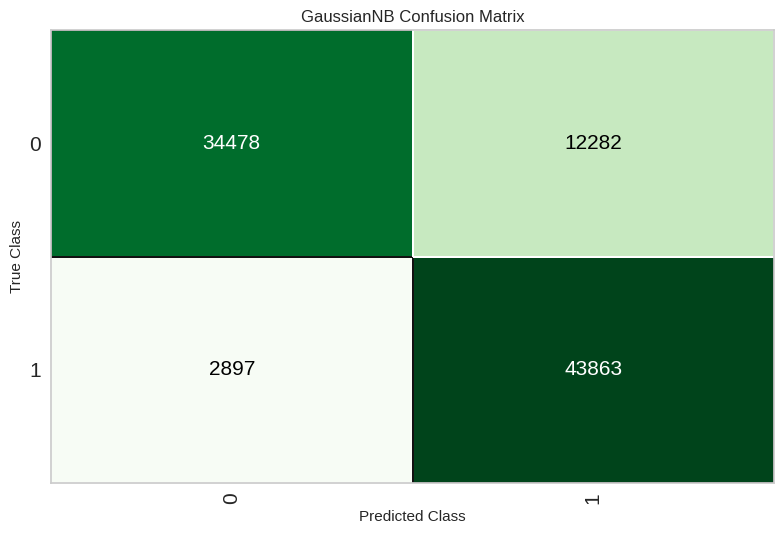

In [11]:
plot_model(nb, plot = 'confusion_matrix')

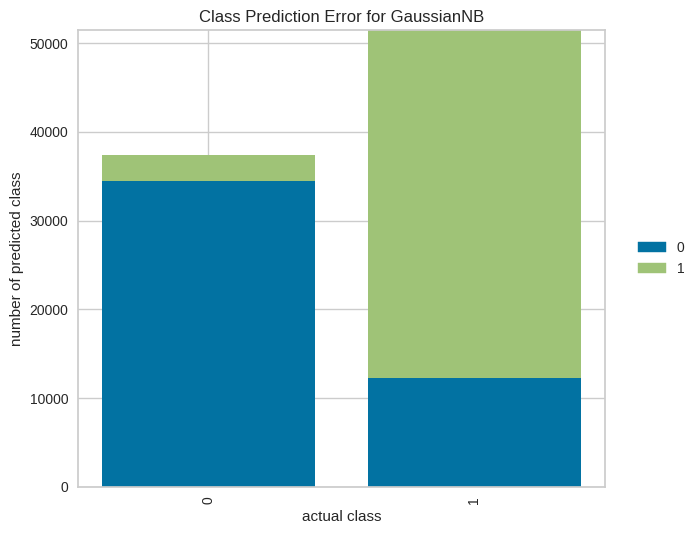

In [12]:
plot_model(nb, plot = 'error')

In [13]:
plot_model(nb, plot = 'parameter')

,Parameters
priors,None
var_smoothing,1e-09


In [14]:
save_model(nb, 'models_classif/toruse/nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                                               missing_values=nan,
                                                  

# Decision Tree Classifier

In [15]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8238,0.8240,0.8190,0.8269,0.8229,0.6476,0.6476
1,0.8237,0.8238,0.8186,0.8270,0.8228,0.6474,0.6474
2,0.8201,0.8202,0.8174,0.8218,0.8196,0.6402,0.6402
3,0.8179,0.8180,0.8158,0.8192,0.8175,0.6358,0.6358
4,0.8233,0.8234,0.8185,0.8265,0.8225,0.6467,0.6467
5,0.8198,0.8199,0.8131,0.8242,0.8186,0.6396,0.6397
6,0.8213,0.8214,0.8193,0.8226,0.8210,0.6426,0.6426
7,0.8204,0.8205,0.8175,0.8223,0.8199,0.6408,0.6408
8,0.8215,0.8215,0.8203,0.8222,0.8212,0.6429,0.6429


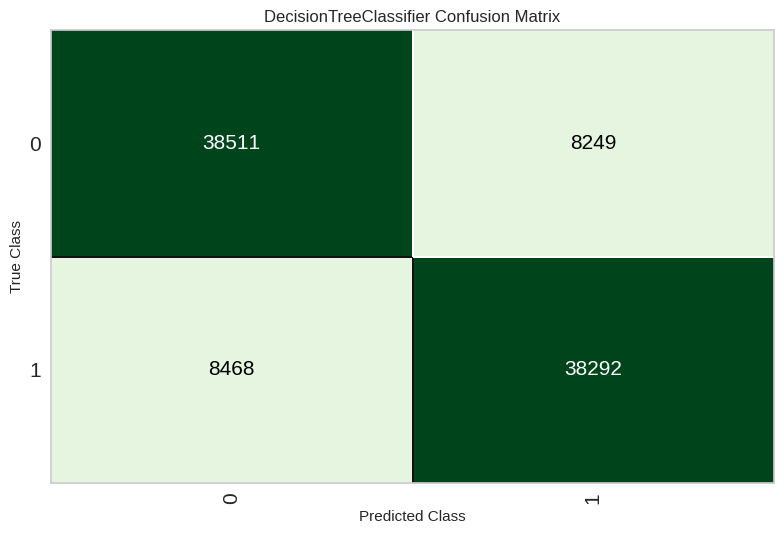

In [16]:
plot_model(dt, plot = 'confusion_matrix')

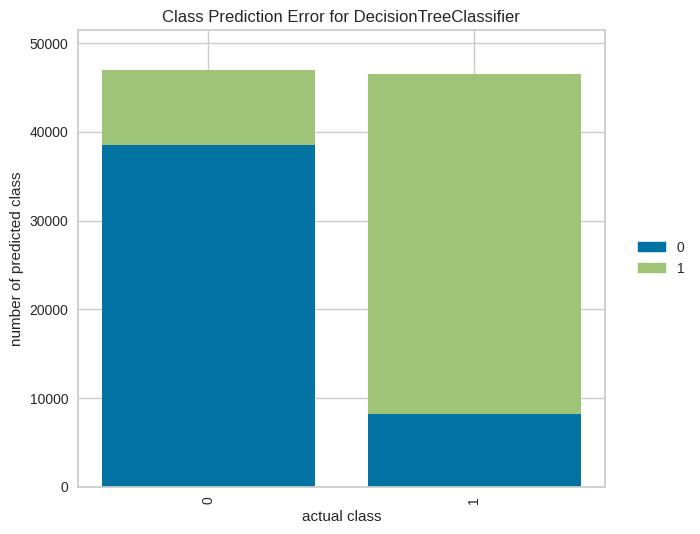

In [17]:
plot_model(dt, plot = 'error')

In [18]:
plot_model(dt, plot = 'parameter')

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


In [19]:
save_model(dt, 'models_classif/toruse/dt')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                                               missing_values=nan,
                                                  

# SVM - Linear Kernel

In [20]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8411,0.0000,0.9428,0.7835,0.8558,0.6823,0.6968
1,0.8390,0.0000,0.9405,0.7818,0.8538,0.6780,0.6924
2,0.8354,0.0000,0.9365,0.7790,0.8505,0.6709,0.6850
3,0.8381,0.0000,0.9434,0.7792,0.8535,0.6761,0.6916
4,0.8409,0.0000,0.9419,0.7836,0.8555,0.6818,0.6962
5,0.8377,0.0000,0.9393,0.7806,0.8526,0.6753,0.6897
6,0.8386,0.0000,0.9430,0.7801,0.8539,0.6772,0.6924
7,0.8405,0.0000,0.9412,0.7834,0.8551,0.6810,0.6953
8,0.8357,0.0000,0.9394,0.7780,0.8511,0.6713,0.6862


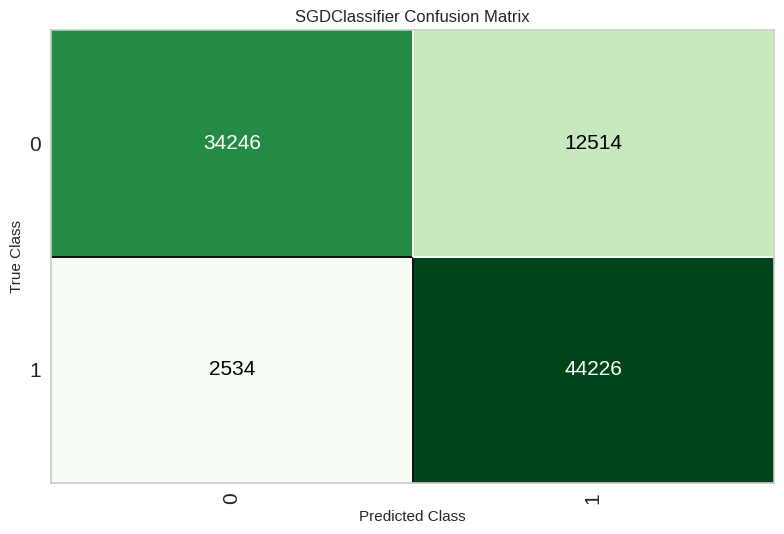

In [21]:
plot_model(svm, plot = 'confusion_matrix')

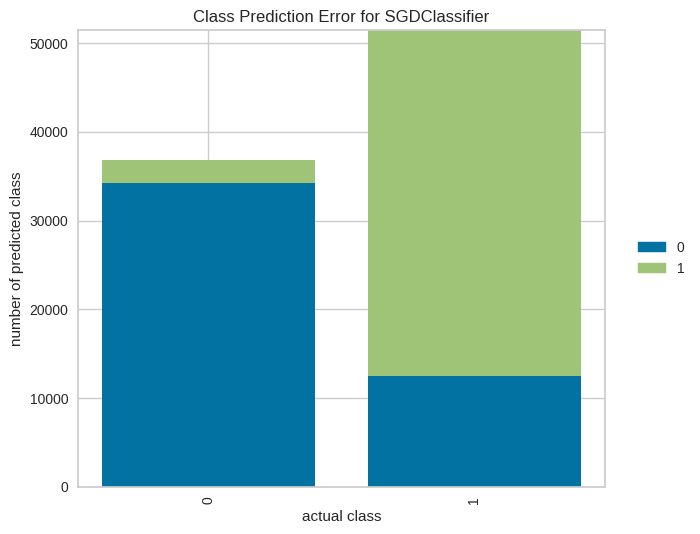

In [22]:
plot_model(svm, plot = 'error')

In [23]:
plot_model(svm, plot = 'parameter')

,Parameters
alpha,0.0001
average,False
class_weight,None
early_stopping,False
epsilon,0.1
eta0,0.001
fit_intercept,True
l1_ratio,0.15
learning_rate,optimal
loss,hinge


In [24]:
save_model(svm, 'models_classif/toruse/svm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                                early_stopping=False,

# Ridge Classifier

In [25]:
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8440,0.0000,0.9739,0.7731,0.8619,0.6880,0.7124
1,0.8435,0.0000,0.9733,0.7727,0.8615,0.6870,0.7114
2,0.8401,0.0000,0.9721,0.7690,0.8587,0.6801,0.7052
3,0.8419,0.0000,0.9739,0.7705,0.8604,0.6839,0.7090
4,0.8430,0.0000,0.9747,0.7715,0.8613,0.6860,0.7111
5,0.8415,0.0000,0.9726,0.7705,0.8598,0.6829,0.7077
6,0.8431,0.0000,0.9750,0.7715,0.8614,0.6862,0.7114
7,0.8440,0.0000,0.9725,0.7736,0.8618,0.6880,0.7119
8,0.8406,0.0000,0.9722,0.7696,0.8591,0.6811,0.7060


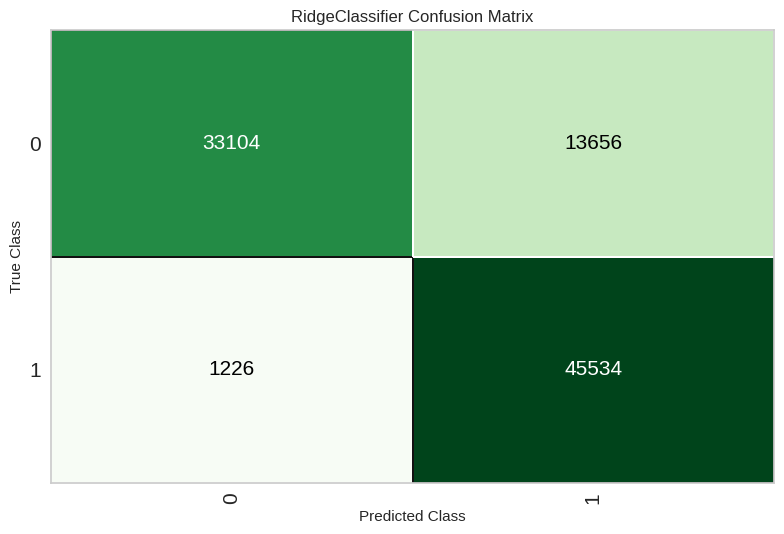

In [26]:
plot_model(ridge, plot = 'confusion_matrix')

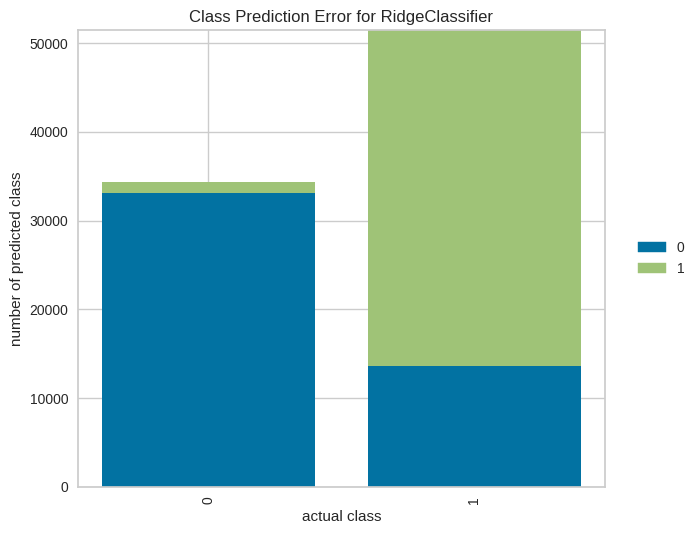

In [27]:
plot_model(ridge, plot = 'error')

In [28]:
plot_model(ridge, plot = 'parameter')

,Parameters
alpha,1.0
class_weight,None
copy_X,True
fit_intercept,True
max_iter,None
positive,False
random_state,5786
solver,auto
tol,0.0001


In [29]:
save_model(ridge, 'models_classif/toruse/ridge')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Random Forest

In [30]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8679,0.9413,0.9610,0.8102,0.8791,0.7358,0.7489
1,0.8691,0.9413,0.9616,0.8115,0.8802,0.7382,0.7512
2,0.8644,0.9382,0.9570,0.8075,0.8759,0.7288,0.7416
3,0.8654,0.9394,0.9609,0.8068,0.8771,0.7308,0.7445
4,0.8667,0.9404,0.9588,0.8096,0.8779,0.7333,0.7461
5,0.8667,0.9398,0.9593,0.8094,0.8780,0.7334,0.7463
6,0.8657,0.9394,0.9619,0.8067,0.8775,0.7314,0.7453
7,0.8689,0.9405,0.9613,0.8114,0.8800,0.7379,0.7508
8,0.8642,0.9391,0.9579,0.8067,0.8758,0.7283,0.7415


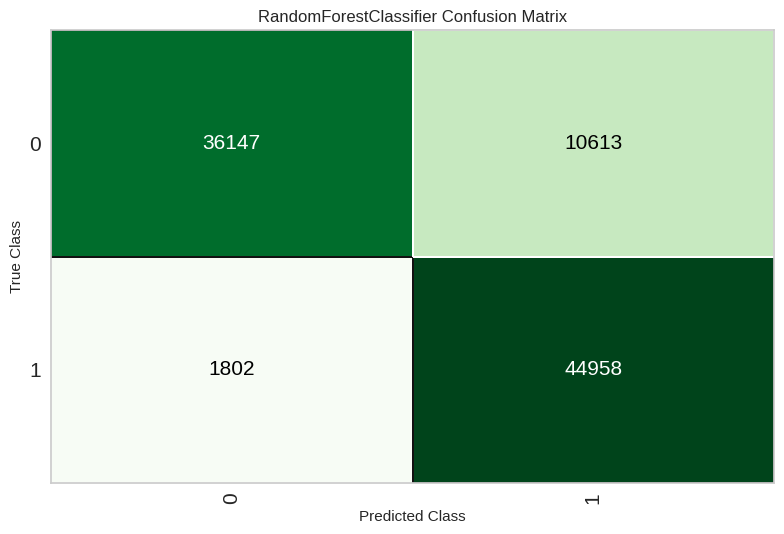

In [31]:
plot_model(rf, plot = 'confusion_matrix')

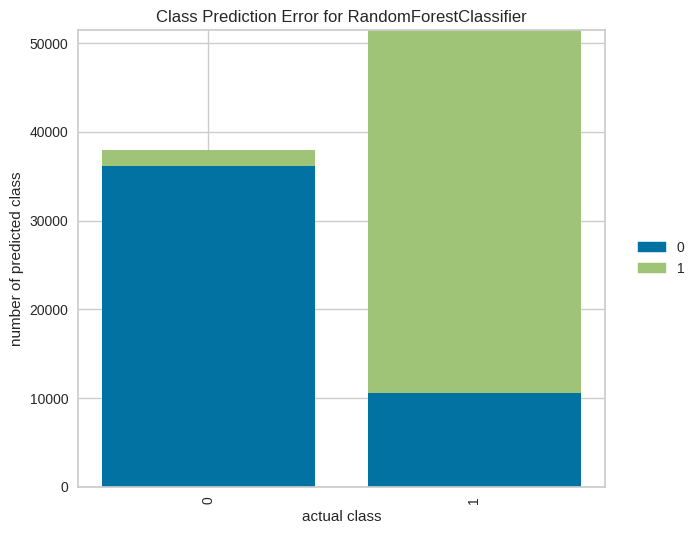

In [32]:
plot_model(rf, plot = 'error')

In [33]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [34]:
save_model(rf, 'models_classif/toruse/rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, c

# Quadratic Discriminant Analysis

In [35]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8244,0.8872,0.9006,0.7815,0.8368,0.6488,0.6565
1,0.8236,0.8846,0.9008,0.7803,0.8362,0.6471,0.6550
2,0.8192,0.8817,0.8942,0.7776,0.8318,0.6384,0.6457
3,0.8227,0.8855,0.9008,0.7791,0.8355,0.6454,0.6534
4,0.8248,0.8847,0.9040,0.7804,0.8377,0.6496,0.6579
5,0.8236,0.8827,0.9014,0.7801,0.8364,0.6473,0.6553
6,0.8235,0.8860,0.9022,0.7794,0.8363,0.6469,0.6551
7,0.8260,0.8867,0.9005,0.7837,0.8381,0.6520,0.6594
8,0.8199,0.8845,0.8961,0.7776,0.8326,0.6398,0.6473


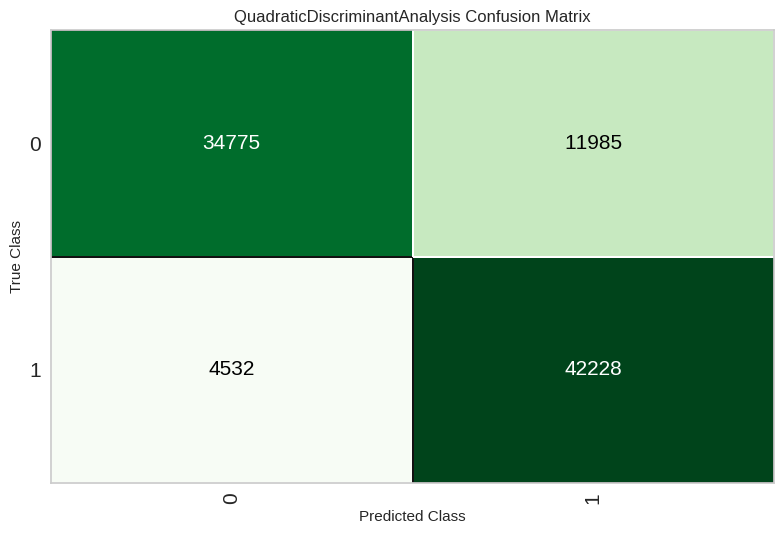

In [36]:
plot_model(qda, plot = 'confusion_matrix')

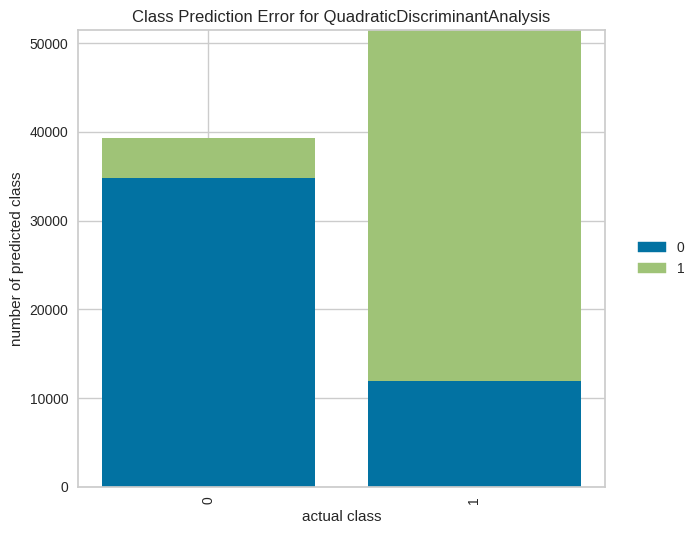

In [37]:
plot_model(qda, plot = 'error')

In [38]:
plot_model(qda, plot = 'parameter')

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


In [39]:
save_model(qda, 'models_classif/toruse/qda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                             

# Linear Discriminant Analysis

In [40]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8438,0.8758,0.9726,0.7734,0.8616,0.6877,0.7117
1,0.8427,0.8746,0.9716,0.7725,0.8607,0.6855,0.7094
2,0.8387,0.8747,0.9697,0.7684,0.8574,0.6773,0.7019
3,0.8412,0.8736,0.9722,0.7703,0.8596,0.6824,0.7071
4,0.8425,0.8760,0.9725,0.7718,0.8606,0.6850,0.7094
5,0.8405,0.8745,0.9712,0.7699,0.8589,0.6810,0.7055
6,0.8411,0.8712,0.9728,0.7700,0.8596,0.6823,0.7072
7,0.8439,0.8741,0.9710,0.7742,0.8615,0.6877,0.7111
8,0.8405,0.8698,0.9715,0.7698,0.8590,0.6810,0.7057


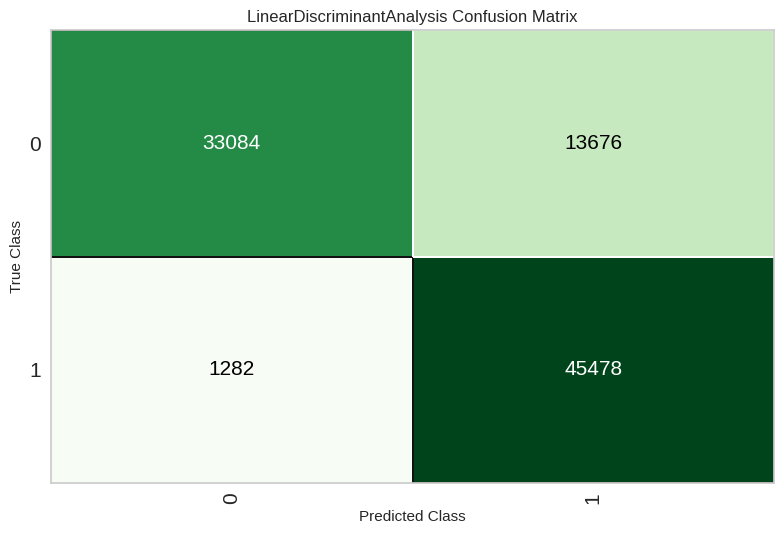

In [41]:
plot_model(lda, plot = 'confusion_matrix')

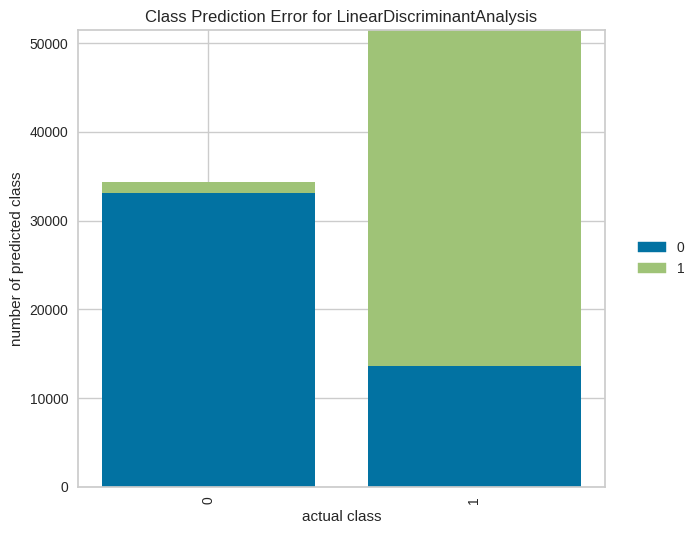

In [42]:
plot_model(lda, plot = 'error')

In [43]:
plot_model(lda, plot = 'parameter')

,Parameters
covariance_estimator,None
n_components,None
priors,None
shrinkage,None
solver,svd
store_covariance,False
tol,0.0001


In [44]:
save_model(lda, 'models_classif/toruse/lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

# Extra Trees

In [45]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8661,0.9427,0.9470,0.8151,0.8761,0.7321,0.7419
1,0.8680,0.9425,0.9454,0.8187,0.8775,0.7360,0.7450
2,0.8643,0.9399,0.9442,0.8142,0.8744,0.7287,0.7381
3,0.8648,0.9410,0.9476,0.8130,0.8751,0.7296,0.7398
4,0.8670,0.9429,0.9465,0.8167,0.8768,0.7341,0.7435
5,0.8648,0.9408,0.9440,0.8149,0.8747,0.7296,0.7389
6,0.8655,0.9412,0.9493,0.8131,0.8759,0.7311,0.7416
7,0.8684,0.9424,0.9470,0.8184,0.8780,0.7368,0.7461
8,0.8656,0.9407,0.9475,0.8141,0.8758,0.7312,0.7412


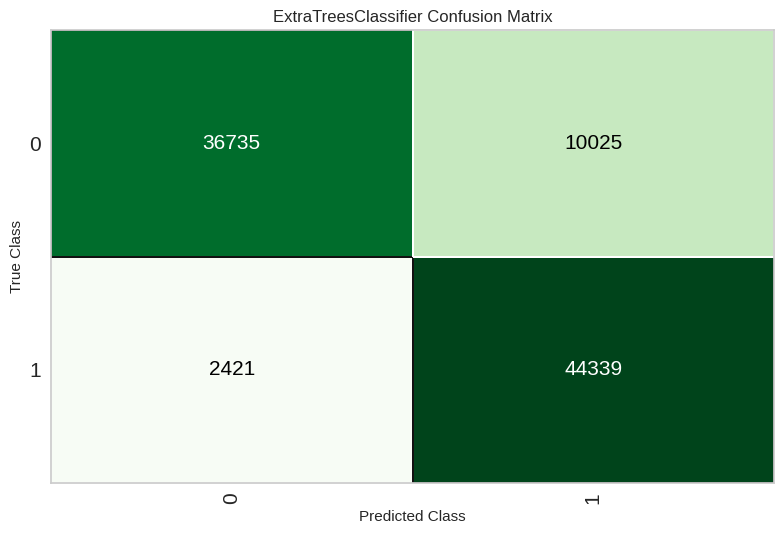

In [46]:
plot_model(et, plot = 'confusion_matrix')

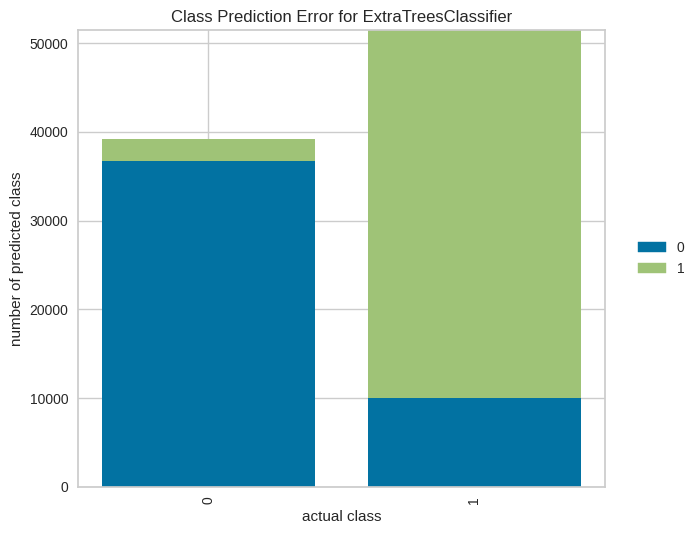

In [47]:
plot_model(et, plot = 'error')

In [48]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,sqrt
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


In [49]:
save_model(et, 'models_classif/toruse/et')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, crit

# Light Gradient Boosting Machine

In [50]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8608,0.9201,0.9892,0.7871,0.8766,0.7216,0.7466
1,0.8591,0.9203,0.9893,0.7849,0.8753,0.7181,0.7438
2,0.8563,0.9184,0.9852,0.7833,0.8727,0.7126,0.7375
3,0.8569,0.9178,0.9881,0.7828,0.8735,0.7139,0.7398
4,0.8584,0.9214,0.9889,0.7842,0.8747,0.7167,0.7425
5,0.8580,0.9178,0.9862,0.7850,0.8741,0.7160,0.7407
6,0.8587,0.9197,0.9902,0.7840,0.8751,0.7174,0.7436
7,0.8607,0.9218,0.9886,0.7872,0.8765,0.7213,0.7462
8,0.8560,0.9174,0.9870,0.7821,0.8727,0.7120,0.7378


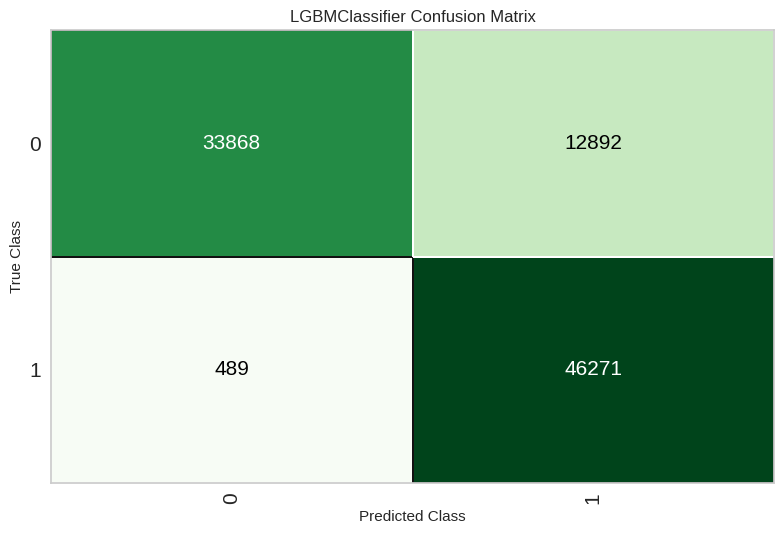

In [51]:
plot_model(lightgbm, plot = 'confusion_matrix')

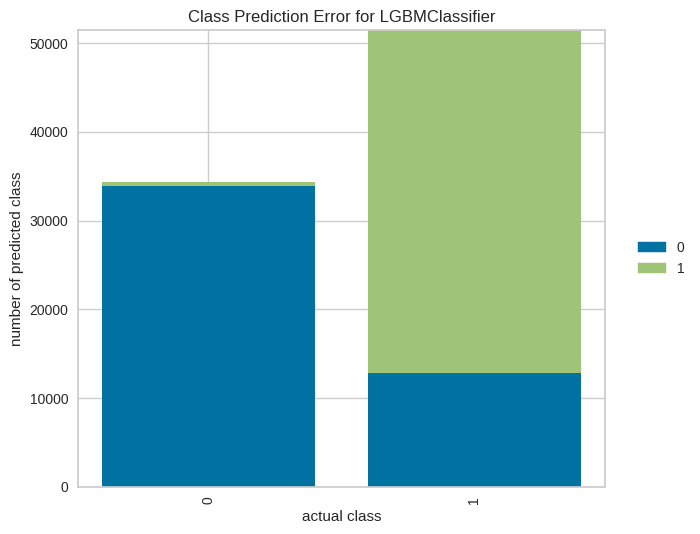

In [52]:
plot_model(lightgbm, plot = 'error')

In [53]:
plot_model(lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


In [54]:
save_model(lightgbm, 'models_classif/toruse/lightgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, impo

# MLP Classifier

In [60]:
mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8579,0.9090,0.9809,0.7872,0.8735,0.7158,0.7385
1,0.8547,0.9088,0.9765,0.7852,0.8705,0.7094,0.7315
2,0.8541,0.9067,0.9827,0.7817,0.8707,0.7082,0.7329
3,0.8533,0.9079,0.9804,0.7817,0.8699,0.7066,0.7306
4,0.8536,0.9117,0.9767,0.7838,0.8697,0.7072,0.7297
5,0.8521,0.9071,0.9706,0.7847,0.8678,0.7042,0.7249
6,0.8542,0.9067,0.9764,0.7847,0.8701,0.7084,0.7305
7,0.8562,0.9084,0.9781,0.7863,0.8718,0.7123,0.7345
8,0.8521,0.9051,0.9786,0.7810,0.8687,0.7042,0.7279


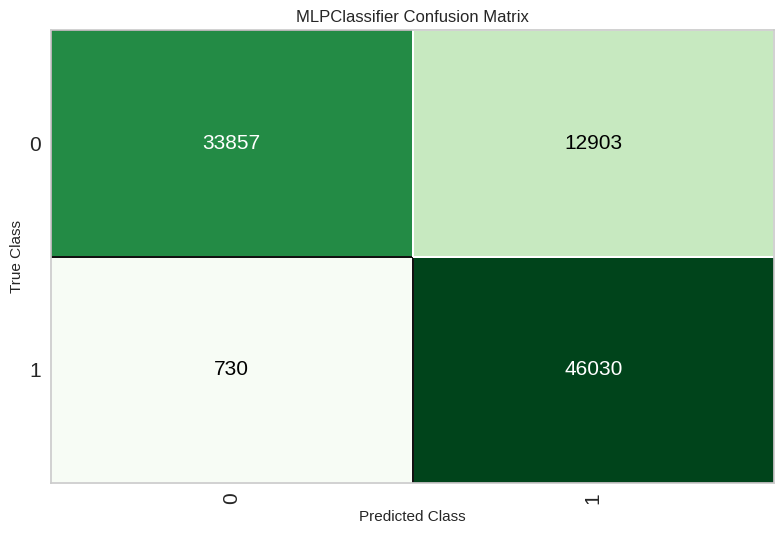

In [61]:
plot_model(mlp, plot = 'confusion_matrix')

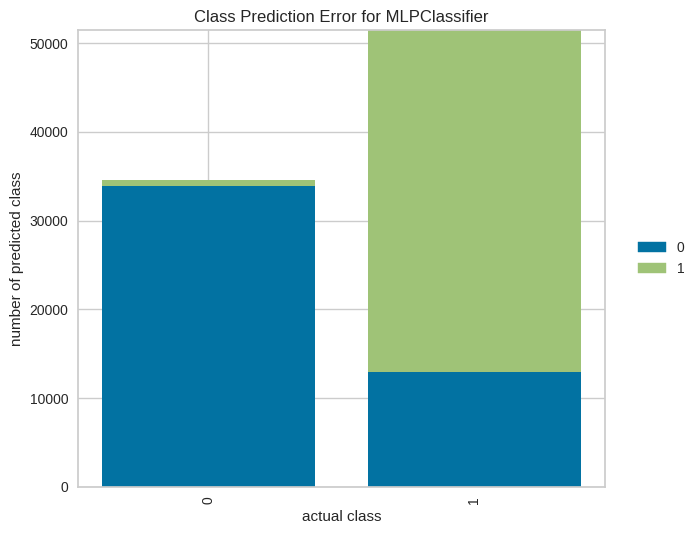

In [62]:
plot_model(mlp, plot = 'error')

In [63]:
plot_model(mlp, plot = 'parameter')

,Parameters
activation,relu
alpha,0.0001
batch_size,auto
beta_1,0.9
beta_2,0.999
early_stopping,False
epsilon,1e-08
hidden_layer_sizes,"(100,)"
learning_rate,constant
learning_rate_init,0.001


In [64]:
save_model(mlp, 'models_classif/toruse/mlp')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_feat...
                                batch_size='auto', beta_1=0.9, beta_2=0.999,
                                early_stopping=False, ep